In [18]:
import numpy as np
import pandas as pd
import sklearn as sk


In [19]:
from sklearn.cluster import KMeans
from time import time
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
%matplotlib inline


## ok, lets begin 

In [20]:
print("This line will be printed.")

This line will be printed.


In [32]:
dataset=pd.read_csv("k2.txt",delimiter="\t",header=None)
dataset.columns = ["x", "y"]

In [33]:
dataset

,x,y
0,0.196706,0.266175
1,0.413287,0.355828
2,0.338436,0.435738
3,0.103802,0.164345
4,0.159052,0.325059
5,0.066905,0.487418
6,0.335731,0.037984
7,0.285496,0.293510
8,0.084884,0.206943
9,0.073828,0.154568


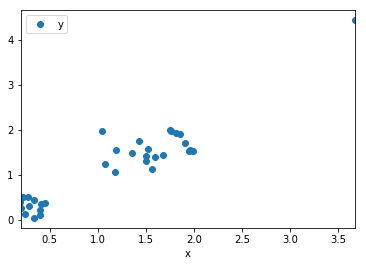

In [34]:
x = dataset['x']
y = dataset['y']
d = {'y' : y.values}

df = pd.DataFrame(d)

df.plot(x=x, style=['o','rx'])

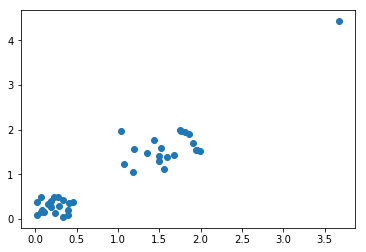

In [35]:
myX = dataset.values
plt.scatter(myX[:,0],myX[:,1], label='True Position')  


In [36]:
kmeans = KMeans(n_clusters=2)  
kmeans.fit(myX)  
print(kmeans.cluster_centers_) 
print(kmeans.labels_)  
print(kmeans.labels_.size)  

[[ 1.6805043   1.70530776]
 [ 0.22331067  0.28960446]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
41


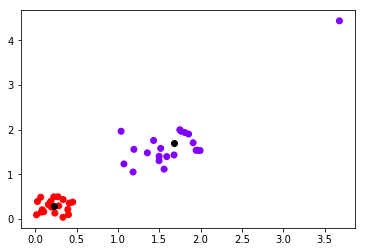

In [37]:
plt.scatter(myX[:,0], myX[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')  

# now we have k-means working. now we add a outlier, and leave it without a cluster, or make it as its own cluter

## im still learning python,so im just going to add a outlier to the .txt

In [55]:
myX

array([[ 0.19670575,  0.26617497],
       [ 0.41328699,  0.35582835],
       [ 0.33843555,  0.43573826],
       [ 0.10380152,  0.16434481],
       [ 0.15905236,  0.32505901],
       [ 0.06690549,  0.48741807],
       [ 0.33573144,  0.03798368],
       [ 0.28549554,  0.29350958],
       [ 0.08488353,  0.20694325],
       [ 0.07382789,  0.15456821],
       [ 0.23803986,  0.13191702],
       [ 0.45405121,  0.37938313],
       [ 0.27608751,  0.49760799],
       [ 0.01646995,  0.09328572],
       [ 0.02693146,  0.39057263],
       [ 0.40253161,  0.09789899],
       [ 0.22568743,  0.49617949],
       [ 0.19132311,  0.40113078],
       [ 0.39482185,  0.21211335],
       [ 0.18214343,  0.36443193],
       [ 1.49835358,  1.40350139],
       [ 1.80899027,  1.93497909],
       [ 1.35650893,  1.47948455],
       [ 1.07324343,  1.23179161],
       [ 1.59099146,  1.39629025],
       [ 1.91018783,  1.70507748],
       [ 1.19376594,  1.55855903],
       [ 1.43236779,  1.7566307 ],
       [ 1.74915973,

[[ 1.87372935  1.76339973]
 [ 0.22331067  0.28960446]
 [ 3.67894101  4.43198061]
 [ 1.4396107   1.33274037]
 [ 1.22177274  1.75920705]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 3 3 0 4 4 0 4 0 0 3 3 3 3 0
 0 0 3 2]
41


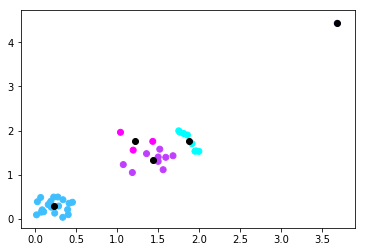

In [38]:
kmeans = KMeans(n_clusters=5)  
kmeans.fit(myX)  
print(kmeans.cluster_centers_) 
print(kmeans.labels_)  
print(kmeans.labels_.size)  

plt.scatter(myX[:,0],myX[:,1], c=kmeans.labels_,cmap='cool')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')  

lets just set n_clusters = 5. we will go on a witch hunt and flag any tiny clusters.... i want to be able to find the sprend of each cluster also. this is because be must have 2 point which are far apart get clustered together, reguardless, they ARE BOTH OUTLIERS    

In [39]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3,
       3, 3, 0, 4, 4, 0, 4, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 2])

##### unused code. here for reference 
myList =[]

for i in range(len(kmeans.labels_)):
    if i == np.argmin(counts):
        myList.append(i)
        
print(myList)

In [70]:
counts = np.bincount(kmeans.labels_)
print('number of repeats for each element: ',counts)
print()

print('list pos of least repeating element: ',np.argmin(counts))
print()

itemindex = np.where(kmeans.labels_==np.argmin(counts))
print('index of least repeating element: ',itemindex)

print()
print((itemindex[0]),type(itemindex[0]))
print()
print((itemindex[0][0]), type(itemindex[0][0]))



      
elemToDel = 20 #itemindex[0][0]
print(myX[elemToDel]) 


#myX = myX[0:x] U myX[x:len(myX)]



print(myX[0:elemToDel])
print()
print(myX[elemToDel+1:myX.size])
print()



a =myX[0:elemToDel]
b =myX[elemToDel+1:myX.size]


myXX = np.append(a, b)
myXX







number of repeats for each element:  [ 8 20  1  9  3]

list pos of least repeating element:  2

index of least repeating element:  (array([40], dtype=int64),)

[40] <class 'numpy.ndarray'>

40 <class 'numpy.int64'>
[ 1.49835358  1.40350139]
[[ 0.19670575  0.26617497]
 [ 0.41328699  0.35582835]
 [ 0.33843555  0.43573826]
 [ 0.10380152  0.16434481]
 [ 0.15905236  0.32505901]
 [ 0.06690549  0.48741807]
 [ 0.33573144  0.03798368]
 [ 0.28549554  0.29350958]
 [ 0.08488353  0.20694325]
 [ 0.07382789  0.15456821]
 [ 0.23803986  0.13191702]
 [ 0.45405121  0.37938313]
 [ 0.27608751  0.49760799]
 [ 0.01646995  0.09328572]
 [ 0.02693146  0.39057263]
 [ 0.40253161  0.09789899]
 [ 0.22568743  0.49617949]
 [ 0.19132311  0.40113078]
 [ 0.39482185  0.21211335]
 [ 0.18214343  0.36443193]]

[[ 1.80899027  1.93497909]
 [ 1.35650893  1.47948455]
 [ 1.07324343  1.23179161]
 [ 1.59099146  1.39629025]
 [ 1.91018783  1.70507748]
 [ 1.19376594  1.55855903]
 [ 1.43236779  1.7566307 ]
 [ 1.74915973  1.99548106]
 

array([ 0.19670575,  0.26617497,  0.41328699,  0.35582835,  0.33843555,
        0.43573826,  0.10380152,  0.16434481,  0.15905236,  0.32505901,
        0.06690549,  0.48741807,  0.33573144,  0.03798368,  0.28549554,
        0.29350958,  0.08488353,  0.20694325,  0.07382789,  0.15456821,
        0.23803986,  0.13191702,  0.45405121,  0.37938313,  0.27608751,
        0.49760799,  0.01646995,  0.09328572,  0.02693146,  0.39057263,
        0.40253161,  0.09789899,  0.22568743,  0.49617949,  0.19132311,
        0.40113078,  0.39482185,  0.21211335,  0.18214343,  0.36443193,
        1.80899027,  1.93497909,  1.35650893,  1.47948455,  1.07324343,
        1.23179161,  1.59099146,  1.39629025,  1.91018783,  1.70507748,
        1.19376594,  1.55855903,  1.43236779,  1.7566307 ,  1.74915973,
        1.99548106,  1.03918449,  1.9624314 ,  1.94632499,  1.53506711,
        1.76367332,  1.96387013,  1.55882055,  1.11562588,  1.18384294,
        1.05144829,  1.49794882,  1.30434895,  1.5178456 ,  1.58

-----------------------------------------------------------------------------

### [ below we have centent from 'k-means-clustering-with-scikit-learn'](https://stackabuse.com/k-means-clustering-with-scikit-learn/)

In [7]:
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np  
from sklearn.cluster import KMeans  

In [8]:
X = np.array([[5,3],  
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91],])

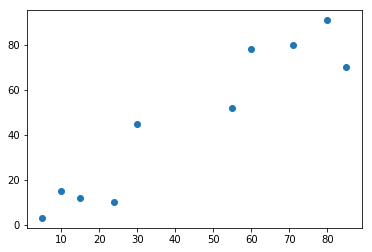

In [9]:
plt.scatter(X[:,0],X[:,1], label='True Position')  


In [10]:
kmeans = KMeans(n_clusters=2)  
kmeans.fit(X)  
print(kmeans.cluster_centers_) 
print(kmeans.labels_)  





[[ 70.2  74.2]
 [ 16.8  17. ]]
[1 1 1 1 1 0 0 0 0 0]


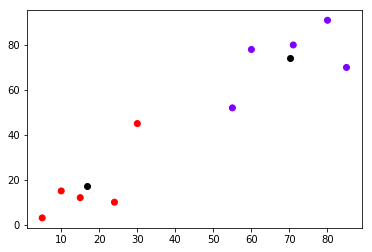

In [11]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')  

### [ below we have centent from 'python data science handbook'](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)

#### here I firgur out density clustering/DBSCAN